# Import Packages & Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

In [ ]:
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

# Read Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/YouTube-Project/youtube-comments-reply-merge-year.csv")

In [ ]:
df.head()

,channel,name,comment,date,year,time,likes
0,Simplilearn,Simplilearn,🔥 Enroll for FREE Machine Learning Course &amp...,2021-03-26,2021,10:21:58,4
1,Simplilearn,Garde Tanmay,can I please get the datasets my email is tanm...,2021-06-20,2021,16:23:47,0
2,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-20,2021,18:33:08,0
3,Simplilearn,Nirbhay Kumar,"Great video , May I request data set at reach2...",2021-06-20,2021,09:22:56,1
4,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-20,2021,18:33:13,0


In [ ]:
df.describe

<bound method NDFrame.describe of            channel                name  ...      time likes
0      Simplilearn         Simplilearn  ...  10:21:58     4
1      Simplilearn        Garde Tanmay  ...  16:23:47     0
2      Simplilearn         Simplilearn  ...  18:33:08     0
3      Simplilearn       Nirbhay Kumar  ...  09:22:56     1
4      Simplilearn         Simplilearn  ...  18:33:13     0
...            ...                 ...  ...       ...   ...
73452      Telusko         Ujjawal Raj  ...  15:30:37     0
73453      Telusko        ashish sinha  ...  15:26:02    21
73454      Telusko              Bytler  ...  21:53:57     0
73455      Telusko  Sai Harshith Sunku  ...  16:20:23     0
73456      Telusko    Rabindra Acharya  ...  15:21:04     0

[73457 rows x 7 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73457 entries, 0 to 73456
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   channel  73457 non-null  object
 1   name     73456 non-null  object
 2   comment  73457 non-null  object
 3   date     73457 non-null  object
 4   year     73457 non-null  int64 
 5   time     73457 non-null  object
 6   likes    73457 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.9+ MB


# Data Cleaning

In [ ]:
df[df["name"].apply(lambda x: pd.isna(x))].head(73457)

,channel,name,comment,date,year,time,likes
72335,freeCodeCamp.org,NaN,One of the best explanations of APIs... easy t...,2019-12-28,2019,16:30:43,1


In [ ]:
df["name"] = df["name"].fillna(value="")

# Dataset collection years

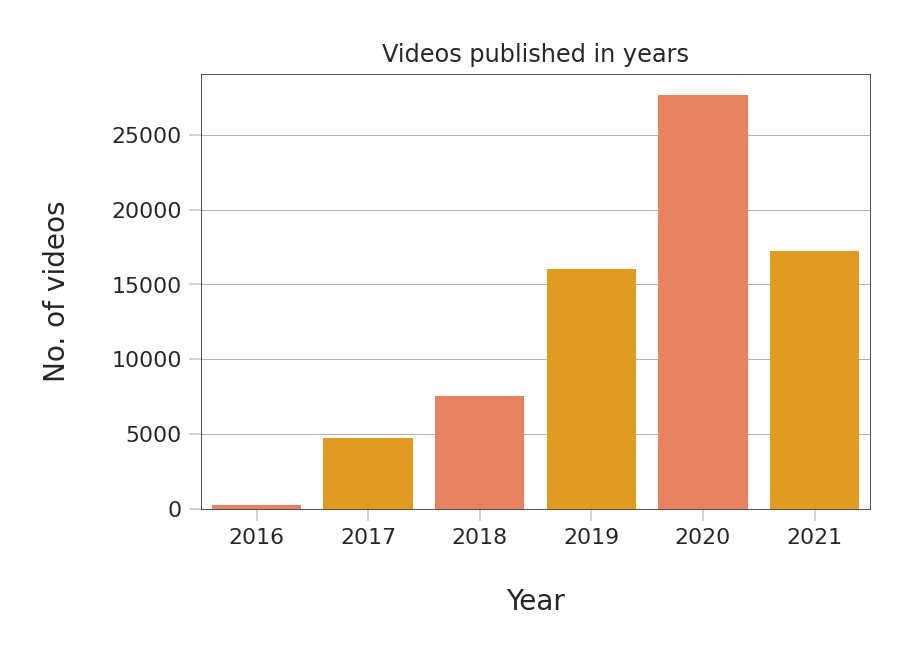

In [ ]:
cdf = df["date"].apply(lambda x: x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "date": "No_of_videos"})
            
cdf = df.groupby("year").size().reset_index(name="No_of_videos") \
    .sort_values("No_of_videos", ascending=False).head(20)

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")
_ = ax.set_title('Videos published in years')

In [ ]:
df["date"].apply(lambda x: x[6:10]).value_counts(normalize=True)

6-07   0.02
6-06   0.01
6-28   0.01
1-19   0.01
6-08   0.01
       ... 
8-16   0.00
8-07   0.00
8-08   0.00
9-12   0.00
9-01   0.00
Name: date, Length: 307, dtype: float64

# Describtion of numerical columns

In [ ]:
df.likes.describe()

count   73457.00
mean        3.55
std        75.29
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      9329.00
Name: likes, dtype: float64

# View histogram

In [ ]:
# Configuration options for improving visualization graphs
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

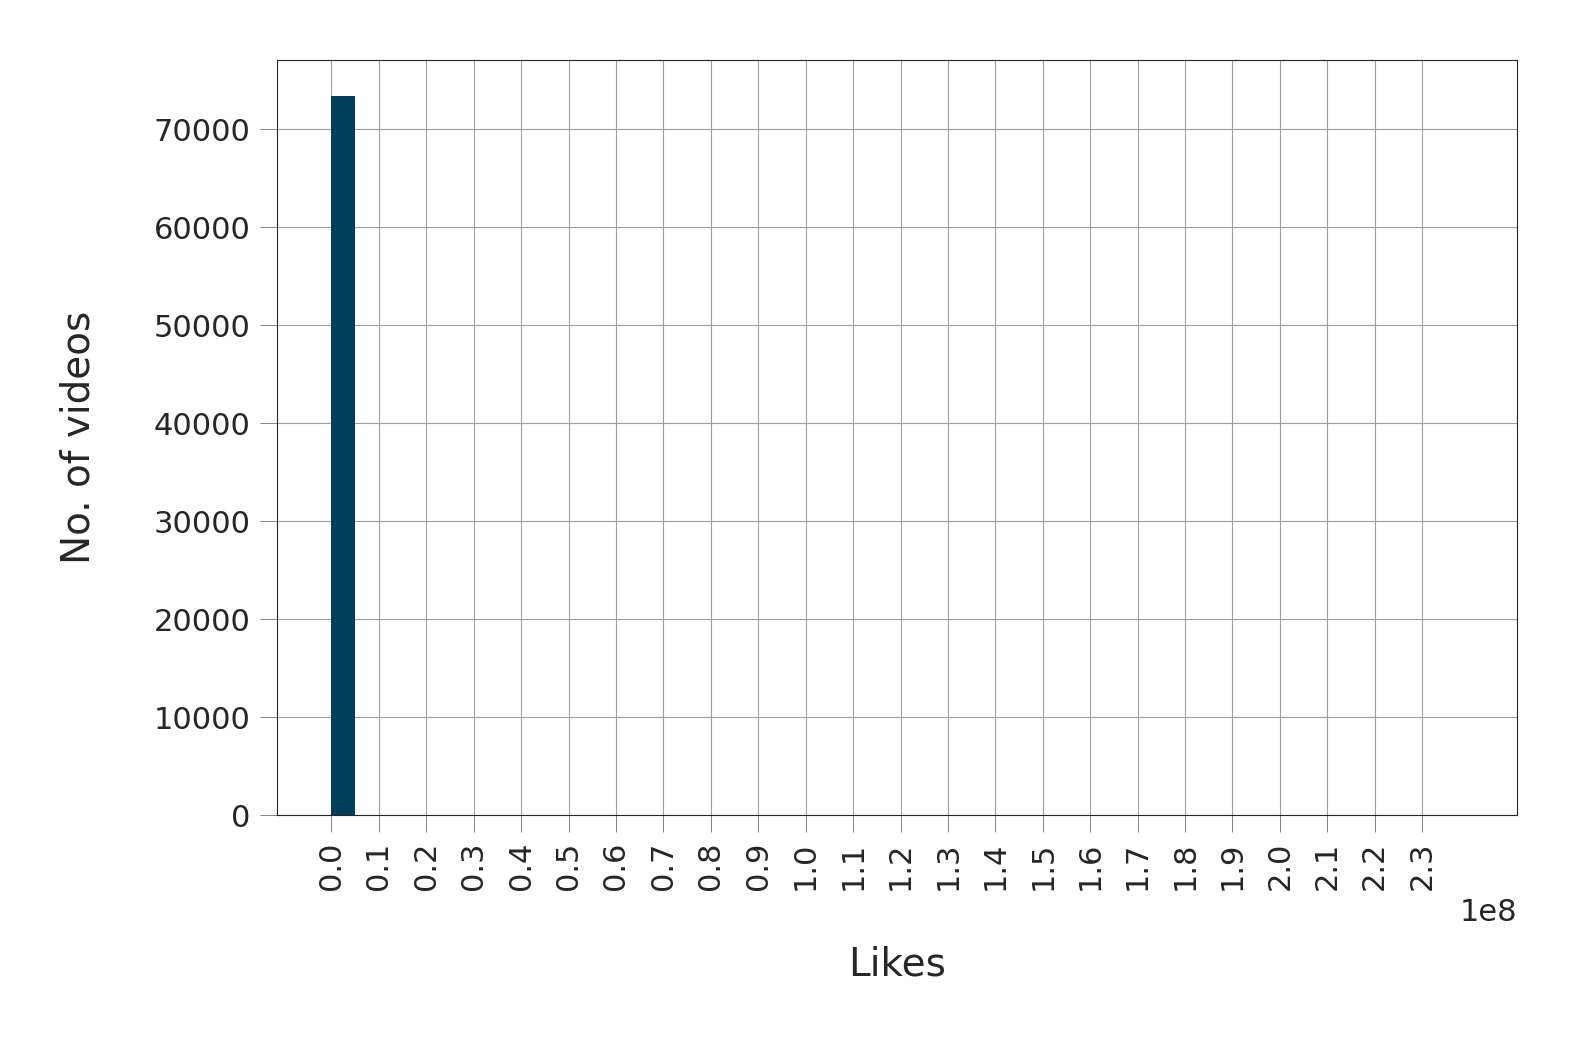

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

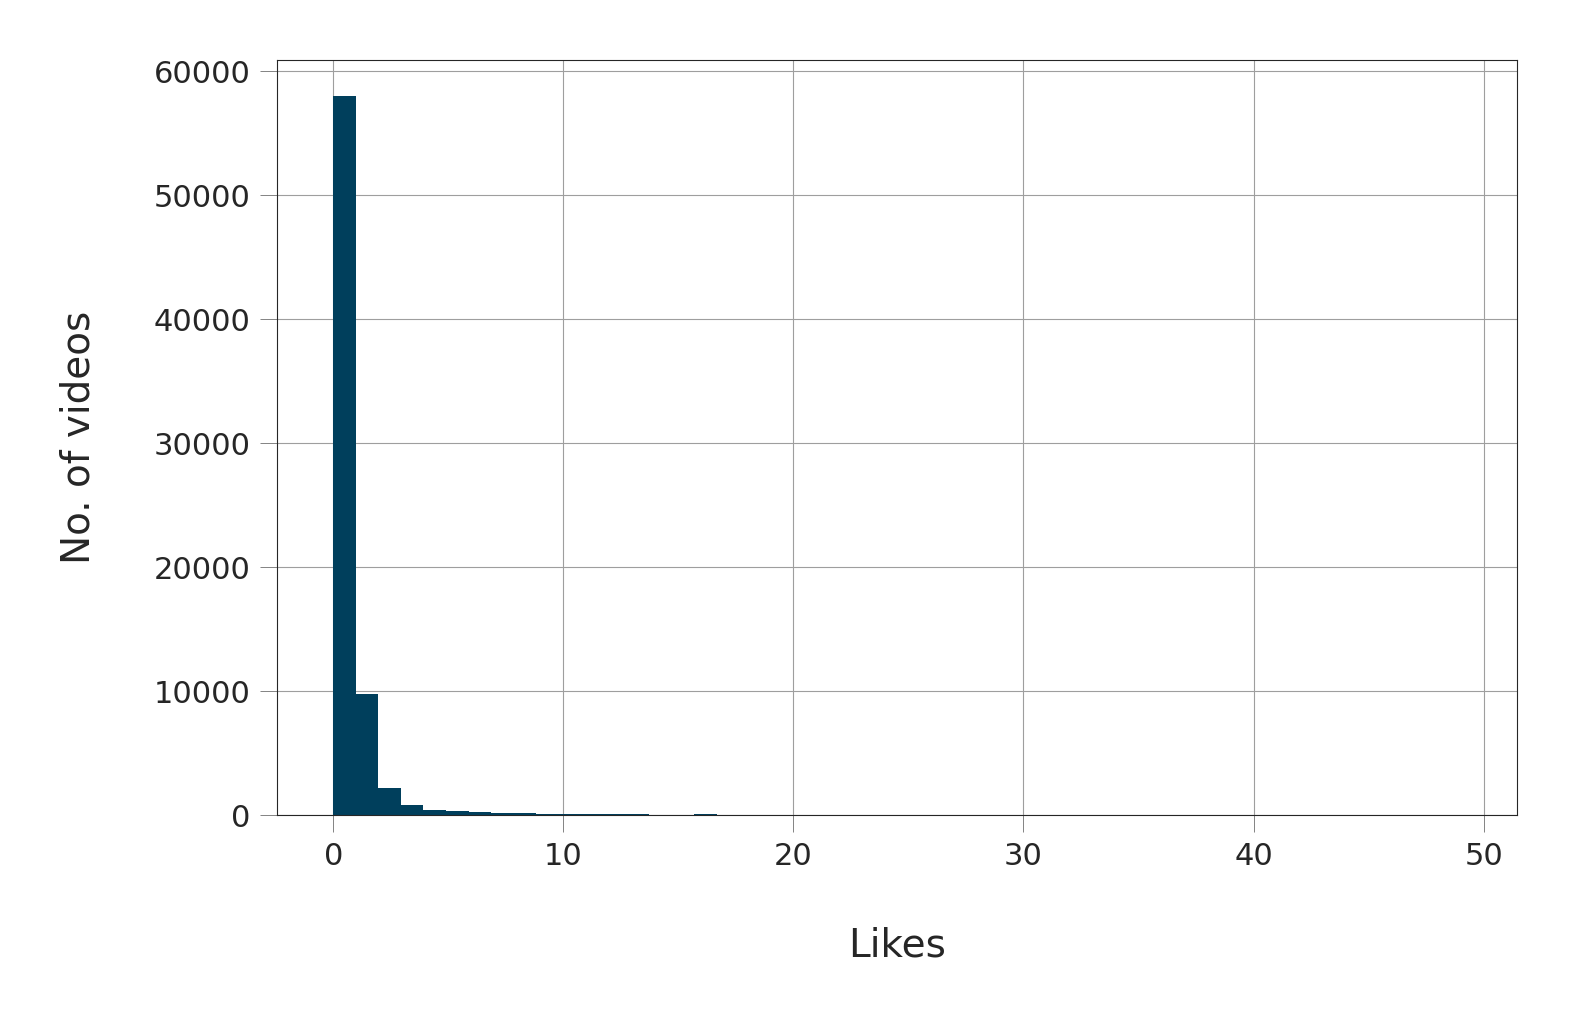

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] < 50]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [ ]:
df[df['likes'] < 1]['likes'].count() / df['likes'].count() * 100

78.9563962590359

# Description on non-numerical columns

In [ ]:
df.describe(include = ['O'])

,channel,name,comment,date,time
count,73457,73457,73457,73457,73457
unique,25,41653,61171,1722,46732
top,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-07,14:48:58
freq,16196,7986,2311,1008,9


In [ ]:
grouped = df.groupby("channel")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['comment'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,channel,name,comment,date,year,time,likes
25164,3Blue1Brown,popi,Her name Veronica,2021-07-12,2021,13:49:23,0
25165,3Blue1Brown,popi,Suddenly woman appears,2021-07-12,2021,13:48:55,0
25166,3Blue1Brown,popi,It was quite complicated but no less but least,2021-07-12,2021,13:47:22,0
25167,3Blue1Brown,popi,4k: /tidak melulu sedemikian sehingga,2021-07-12,2021,13:42:41,0
25168,3Blue1Brown,Ali Al-Qassab,"Thank you Grant, you are the best...",2021-07-12,2021,05:37:48,0
...,...,...,...,...,...,...,...
38325,3Blue1Brown,Delta Beta,"<a href=""https://m.youtube.com/watch?v=lebz80S...",2017-11-03,2017,14:11:06,0
38326,3Blue1Brown,Want - Diverse Content,1,2017-11-03,2017,14:08:58,0
38327,3Blue1Brown,2000tmaster,first,2017-11-03,2017,14:08:53,2
38328,3Blue1Brown,Want - Diverse Content,2000tmaster <br>not both of us,2017-11-03,2017,14:22:43,0


# Capitalized words

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

In [ ]:
df["contains_capitalized"] = df["comment"].apply(contains_capitalized_word)

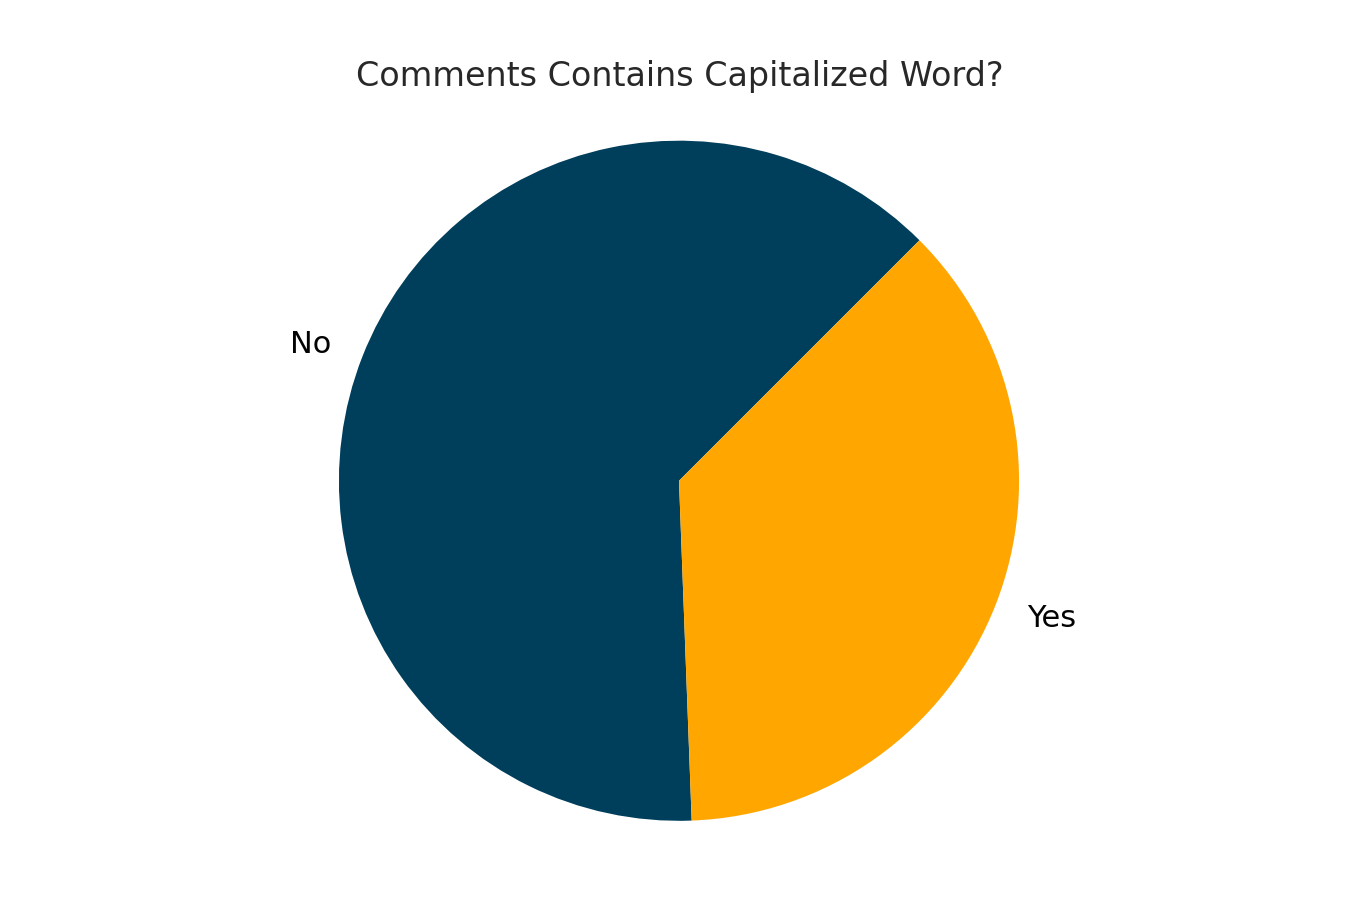

In [ ]:
value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Comments Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.63
True    0.37
Name: contains_capitalized, dtype: float64

# Comment lengths

In [ ]:
df["comment_length"] = df["comment"].apply(lambda x: len(x))

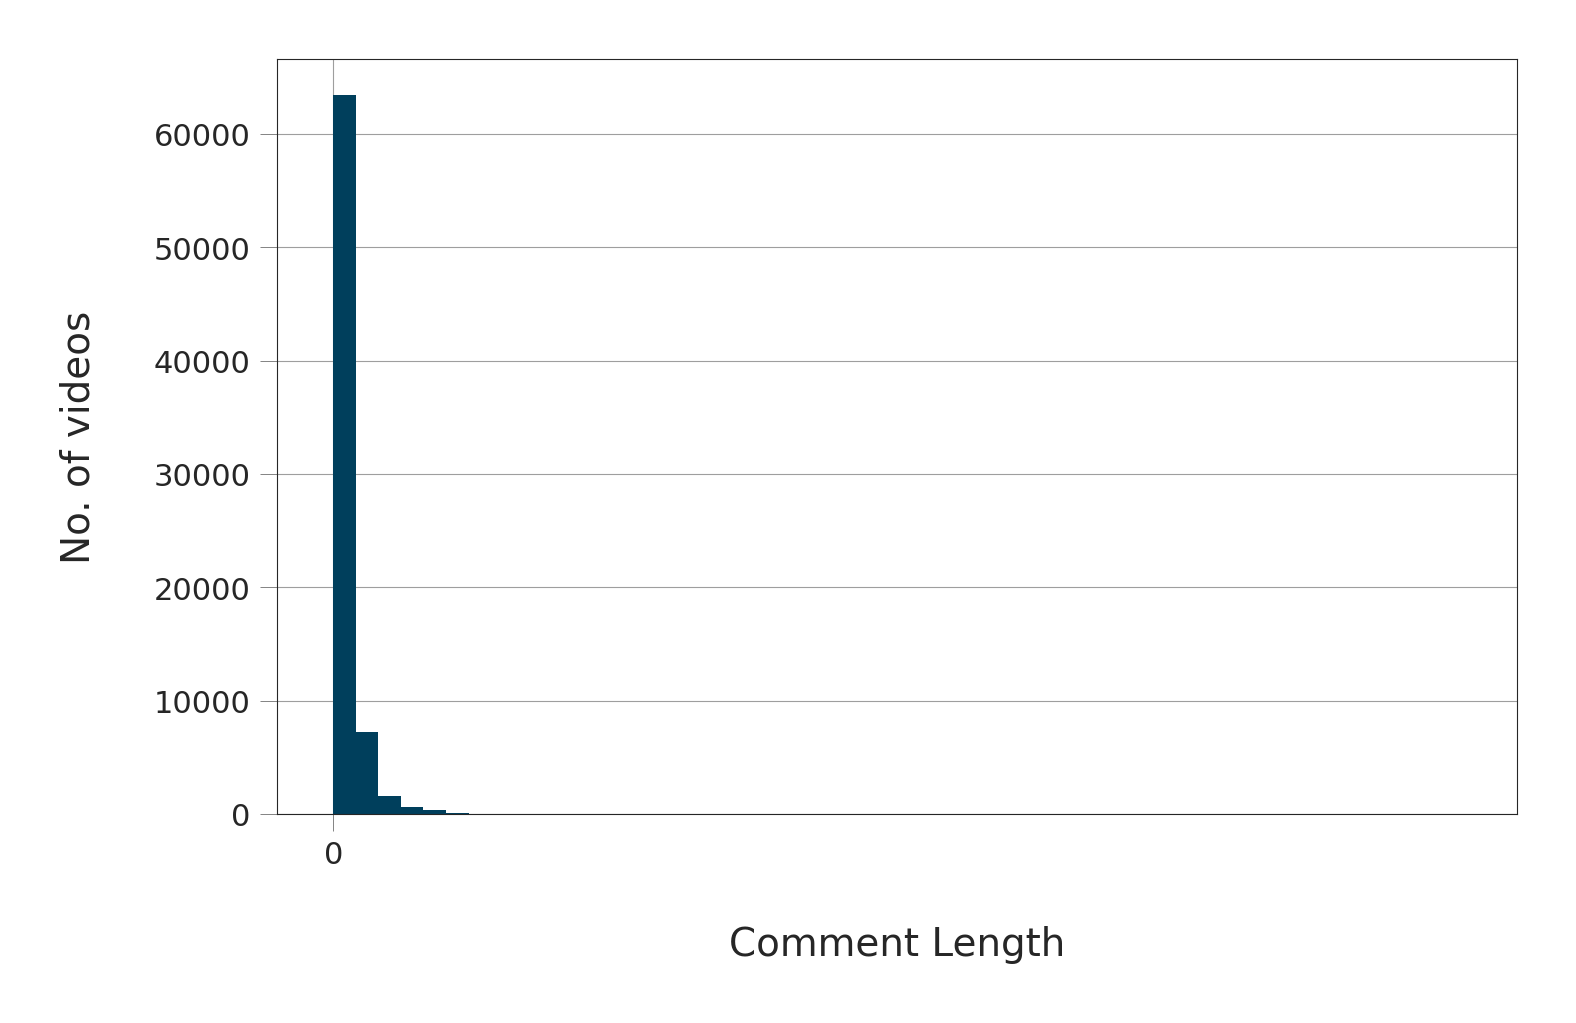

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Length", ylabel="No. of videos", xticks=range(0, 1, 2))

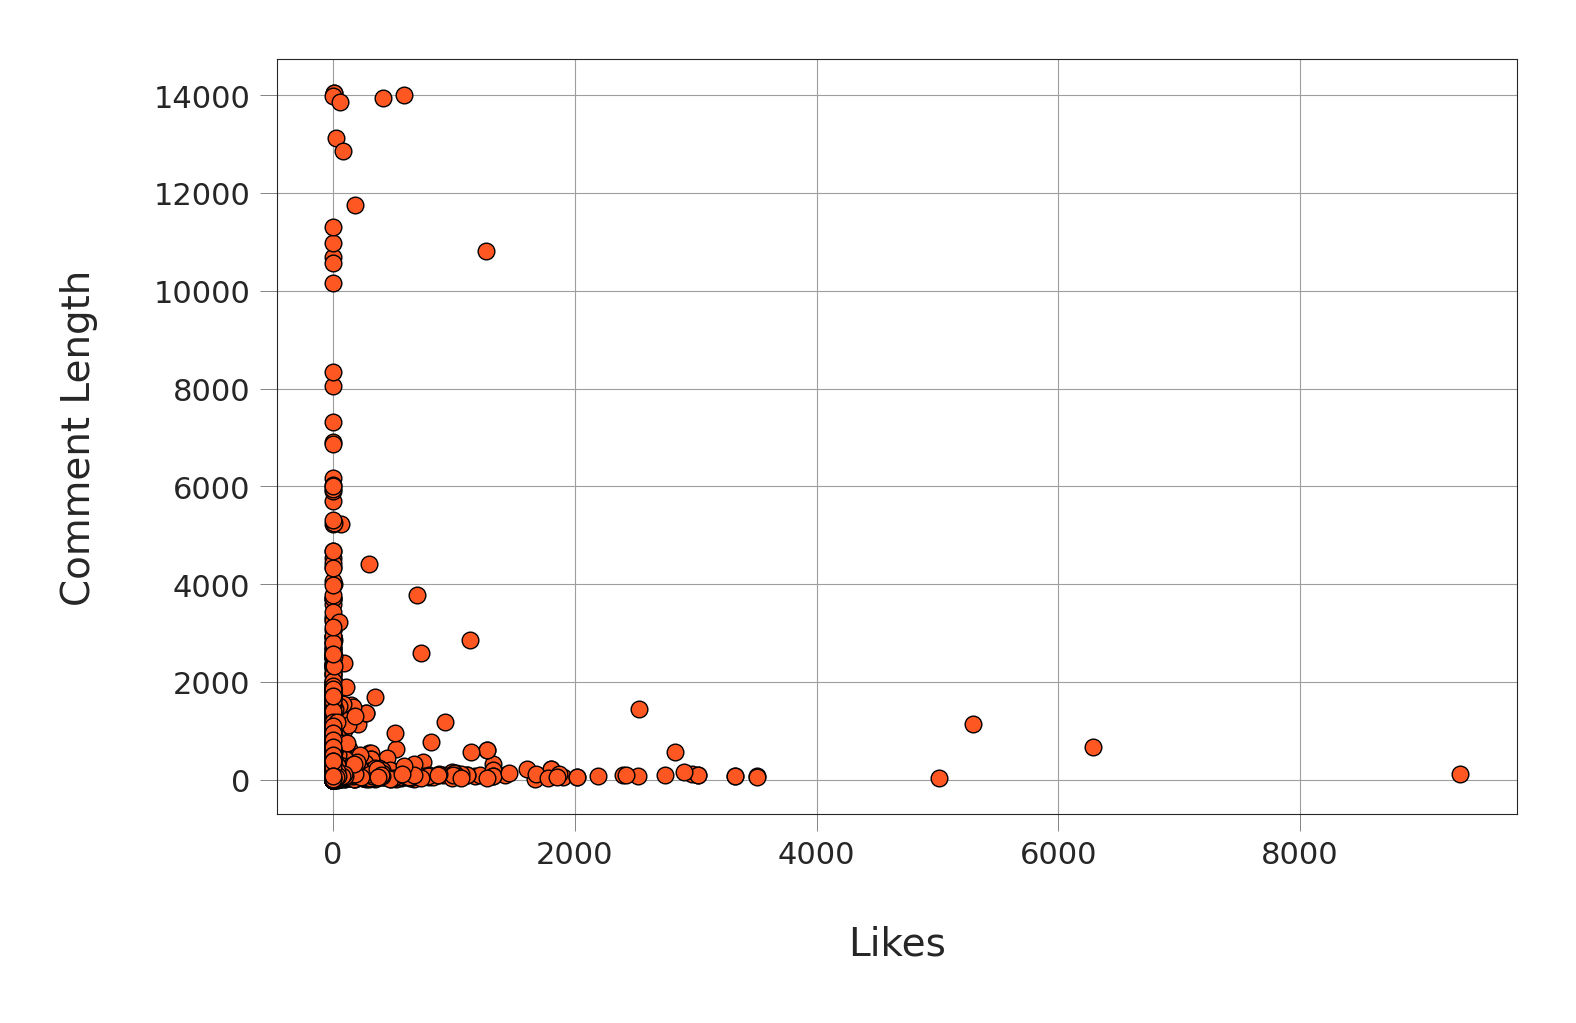

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['likes'], y=df['comment_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Likes", ylabel="Comment Length")

# Correlation between dataset variables

In [ ]:
df.corr()

,year,likes,contains_capitalized,comment_length
year,1.00,-0.04,-0.02,-0.03
likes,-0.04,1.00,0.01,0.03
contains_capitalized,-0.02,0.01,1.00,0.23
comment_length,-0.03,0.03,0.23,1.00


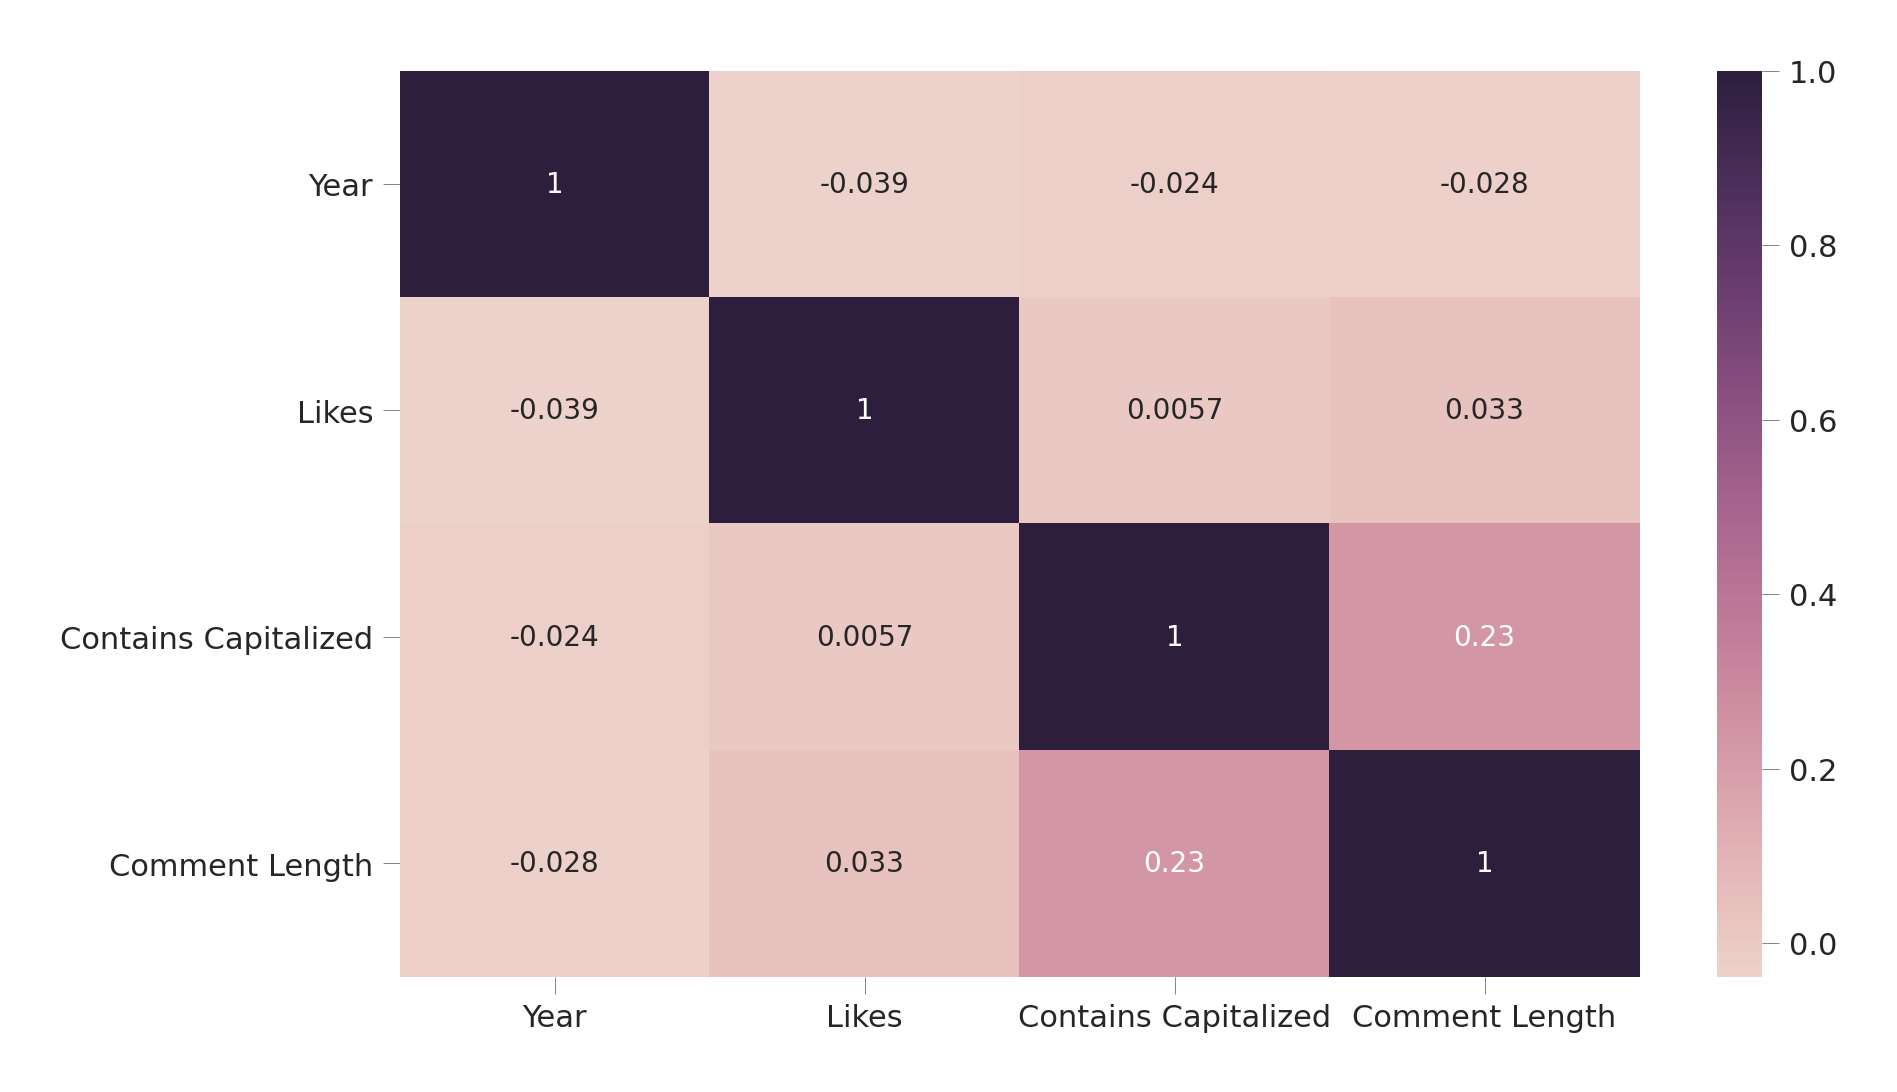

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

# Most common words in comments

In [ ]:
comment_words = list(df["comment"].apply(lambda x: x.split()))
comment_words = [x for y in comment_words for x in y]
Counter(comment_words).most_common(100)

[('the', 65513),
 ('to', 46625),
 ('and', 31986),
 ('you', 28892),
 ('is', 26621),
 ('a', 26212),
 ('for', 24733),
 ('I', 23555),
 ('of', 22081),
 ('in', 18855),
 ('your', 16278),
 ('this', 15372),
 ('that', 14675),
 ('have', 12587),
 ('it', 11939),
 ('on', 10572),
 ('our', 10507),
 ('are', 10255),
 ('as', 9463),
 ('with', 8733),
 ('<a', 8416),
 ('be', 8395),
 ('can', 7959),
 ('video', 7342),
 ('like', 7269),
 ('we', 6983),
 ('an', 6557),
 ('so', 6522),
 ('not', 6200),
 ('me', 6055),
 ('by', 5937),
 ('my', 5864),
 ('dataset', 5833),
 ('thanks', 5700),
 ('Thank', 5551),
 ('data', 5432),
 ('but', 5287),
 ('We', 5254),
 ('do', 5127),
 ('will', 4779),
 ('i', 4724),
 ('from', 4710),
 ('Thanks', 4703),
 ('video.', 4686),
 ('would', 4579),
 ('The', 4423),
 ('if', 4418),
 ('using', 4251),
 ('don&#39;t', 4251),
 ('channel', 4227),
 (':)', 4222),
 ('AI', 4222),
 ('Do', 4213),
 ('how', 4210),
 ('or', 4208),
 ('watching', 3997),
 ('at', 3852),
 ('mail', 3851),
 ('please', 3847),
 ('love', 3813),
 

# Word Cloud

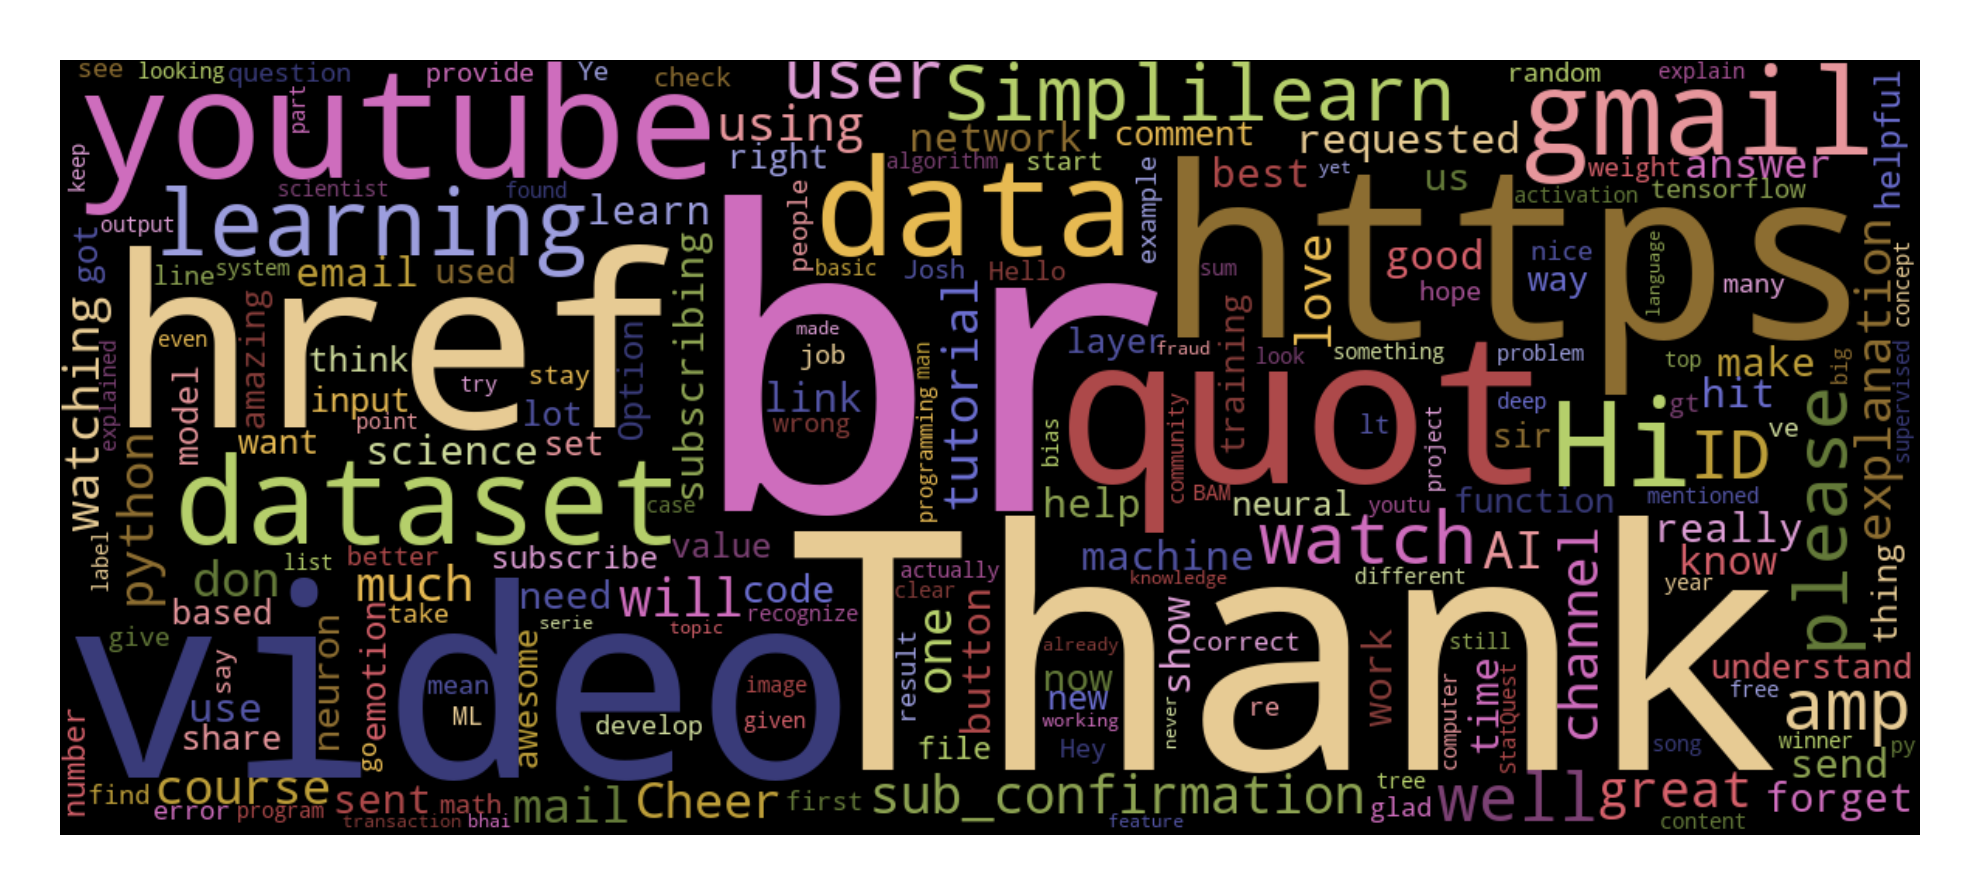

In [ ]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="black", 
                         colormap="tab20b").generate(" ".join(comment_words))
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Largest number of comments by channels

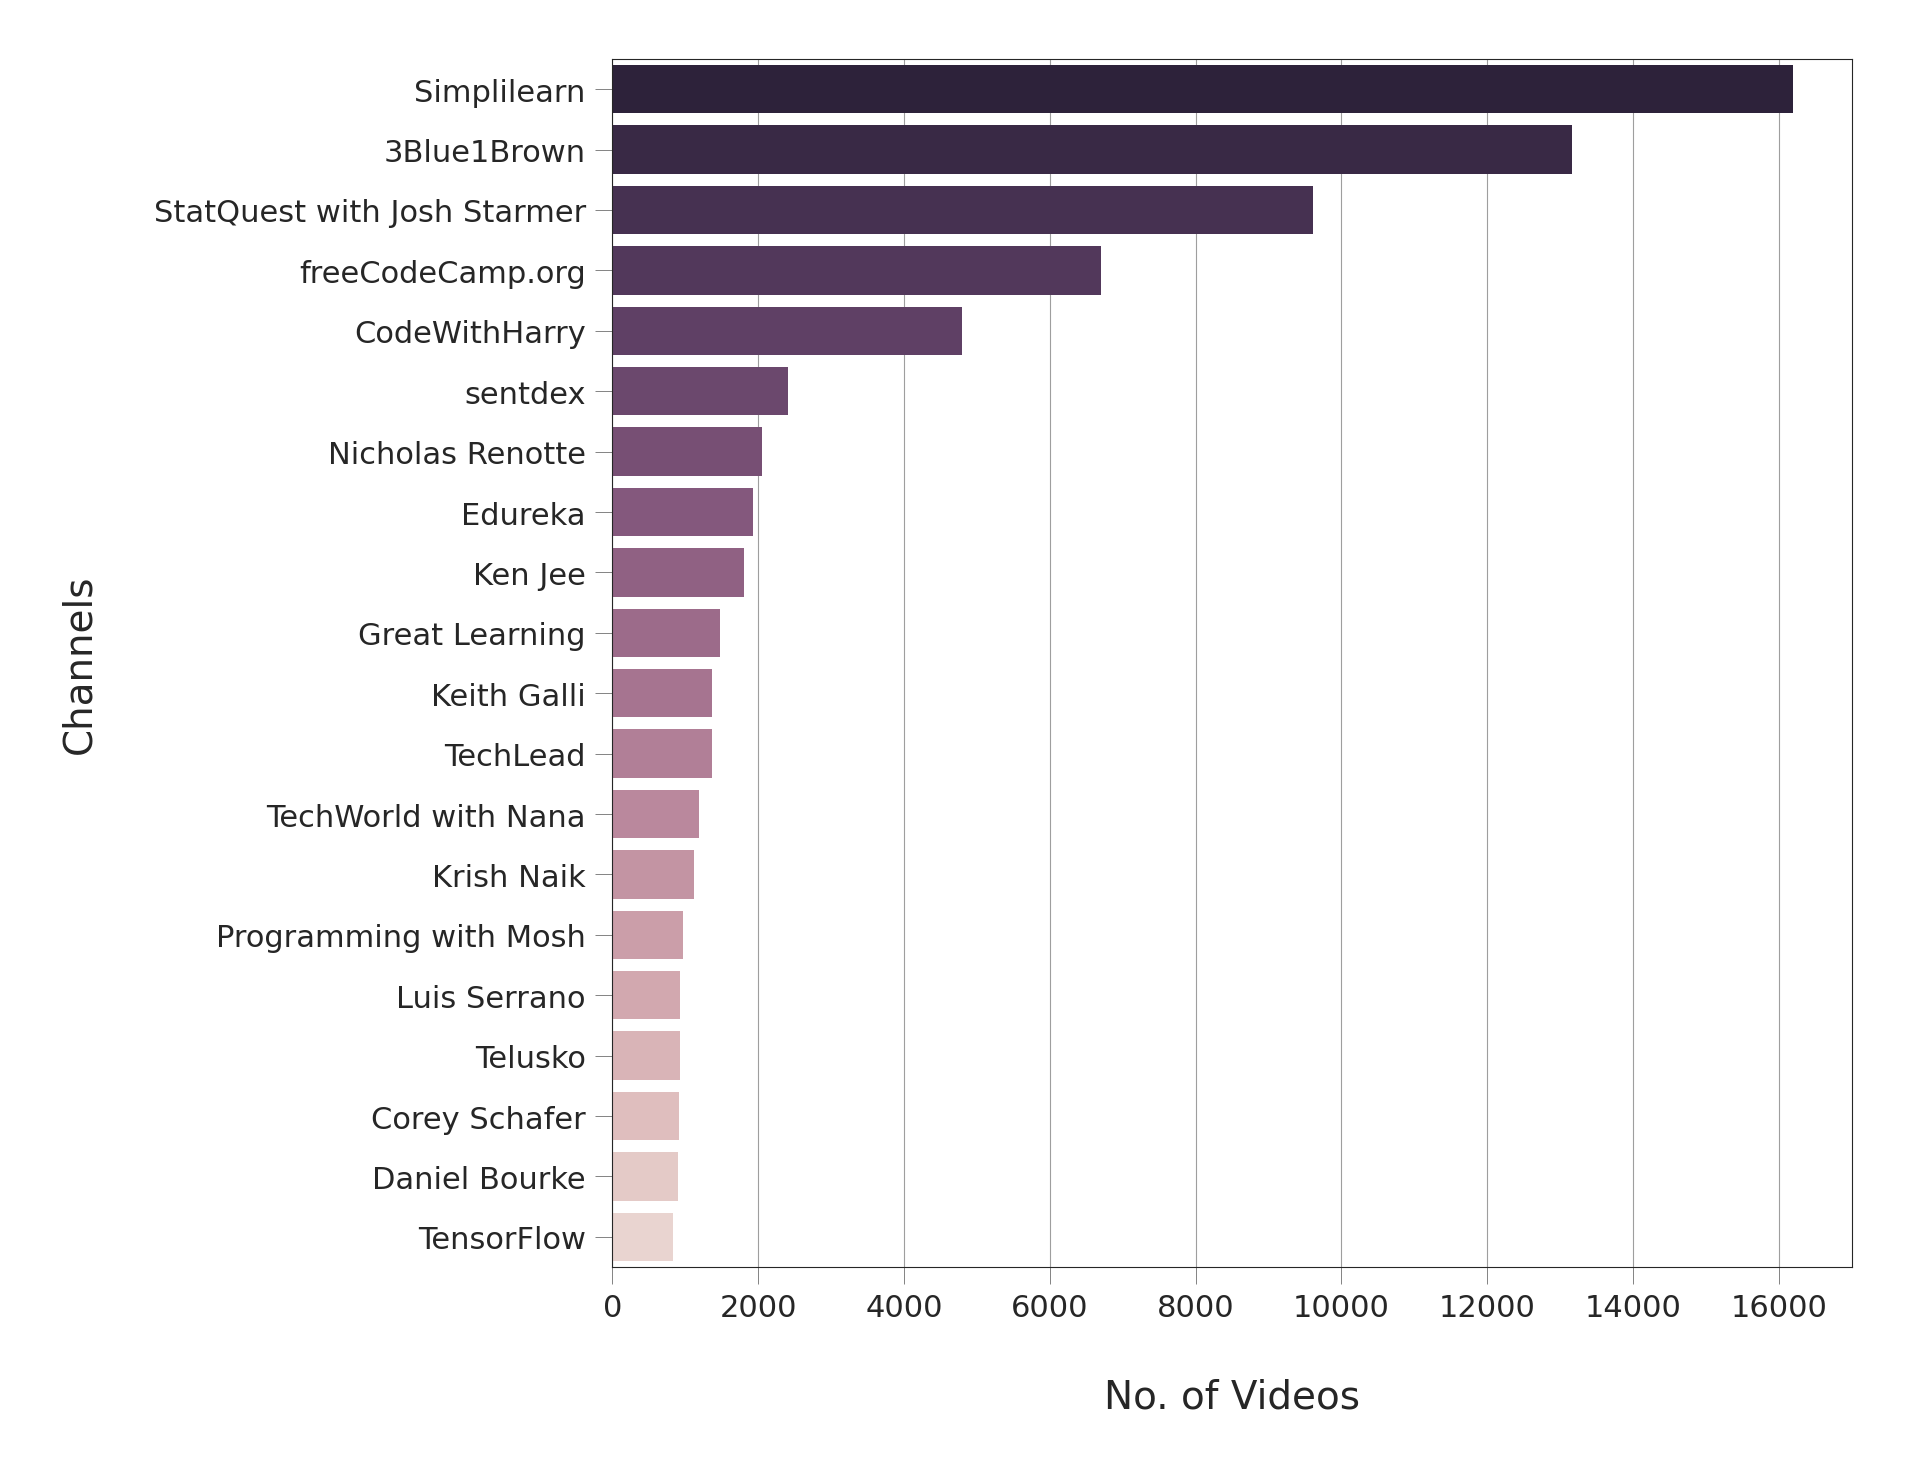

In [ ]:
cdf = df.groupby("channel").size().reset_index(name="comment_count") \
    .sort_values("comment_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="comment_count", y="channel", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of Videos", ylabel="Channels")

# Largest number of comments from users

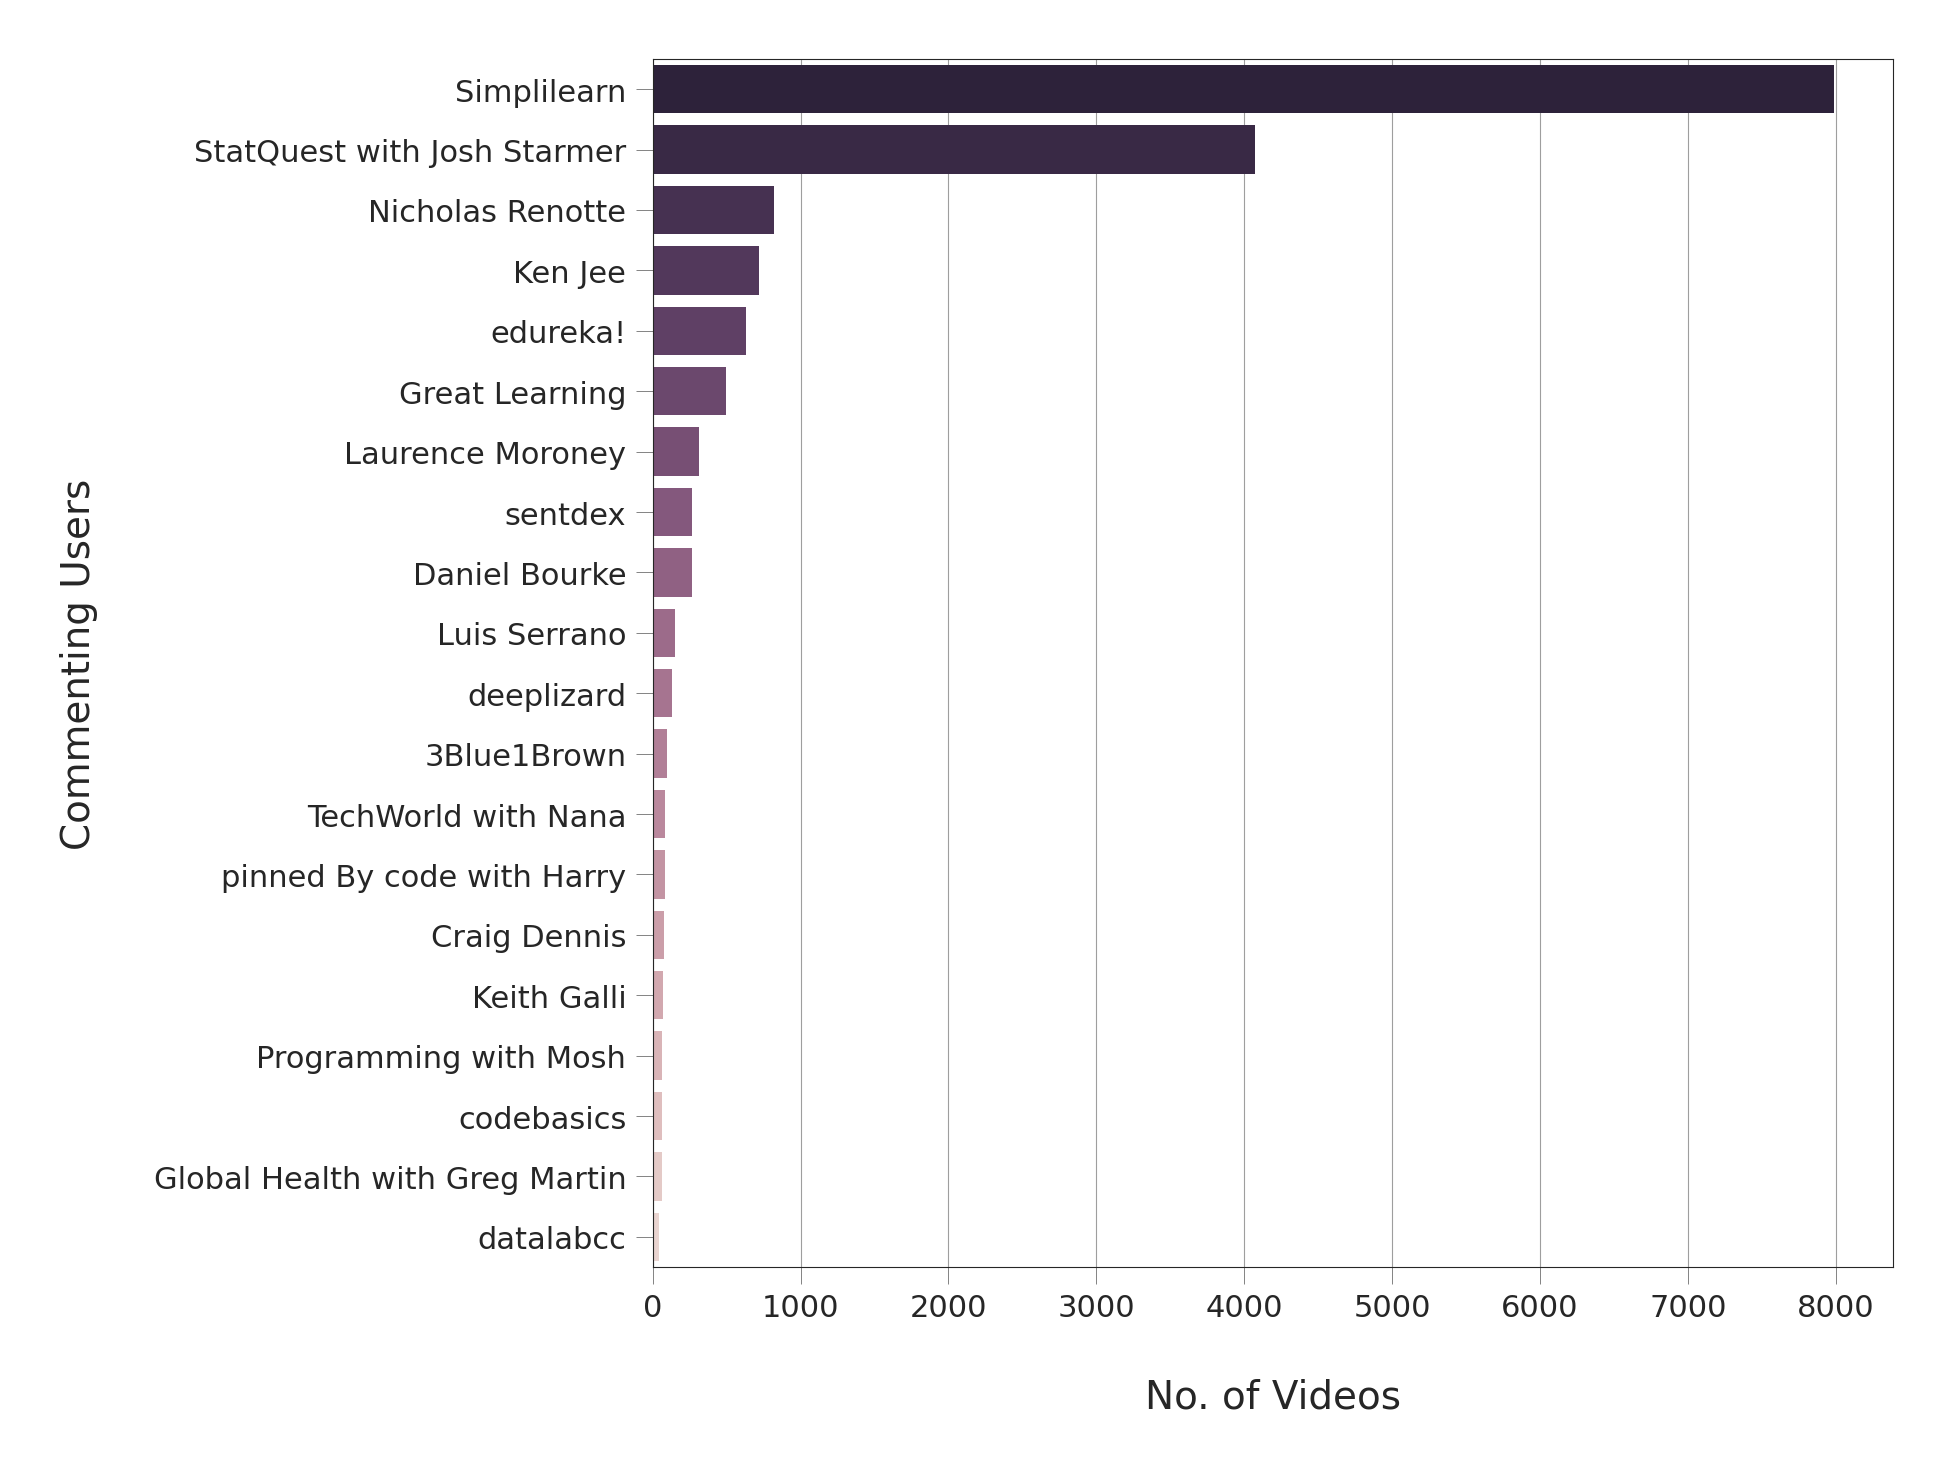

In [ ]:
cdf = df.groupby("name").size().reset_index(name="comment_count") \
    .sort_values("comment_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="comment_count", y="name", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of Videos", ylabel="Commenting Users")

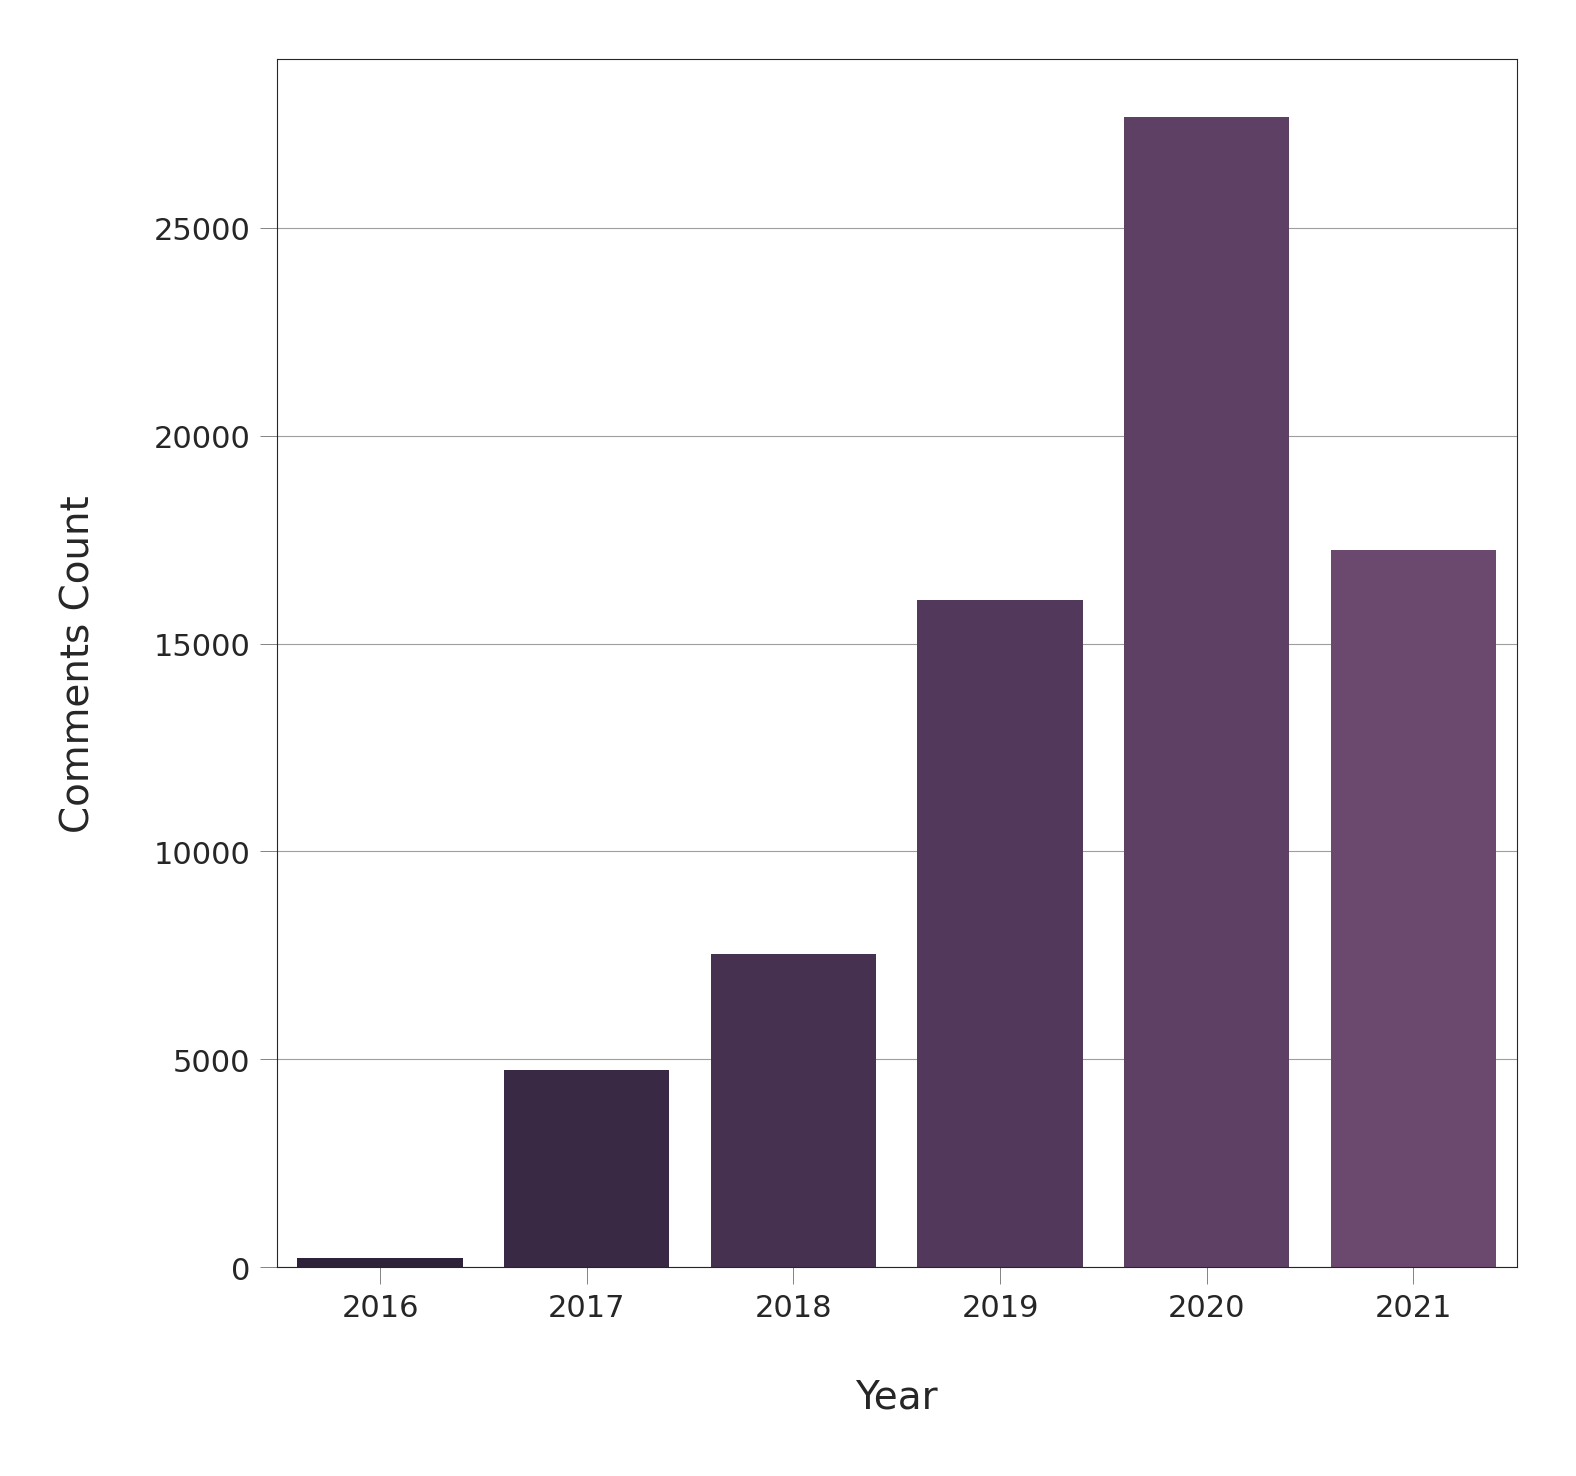

In [ ]:
cdf = df.groupby("year").size().reset_index(name="comment_count") \
    .sort_values("comment_count", ascending=False)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="year", y="comment_count", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Year", ylabel="Comments Count")

In [ ]:
df.head()

,channel,name,comment,date,year,time,likes,contains_capitalized,comment_length
0,Simplilearn,Simplilearn,🔥 Enroll for FREE Machine Learning Course &amp...,2021-03-26,2021,10:21:58,4,True,376
1,Simplilearn,Garde Tanmay,can I please get the datasets my email is tanm...,2021-06-20,2021,16:23:47,0,True,97
2,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-20,2021,18:33:08,0,True,346
3,Simplilearn,Nirbhay Kumar,"Great video , May I request data set at reach2...",2021-06-20,2021,09:22:56,1,True,105
4,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-20,2021,18:33:13,0,True,346


# Commenting day of videos

In [ ]:
df["commenting_day"] = df["date"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

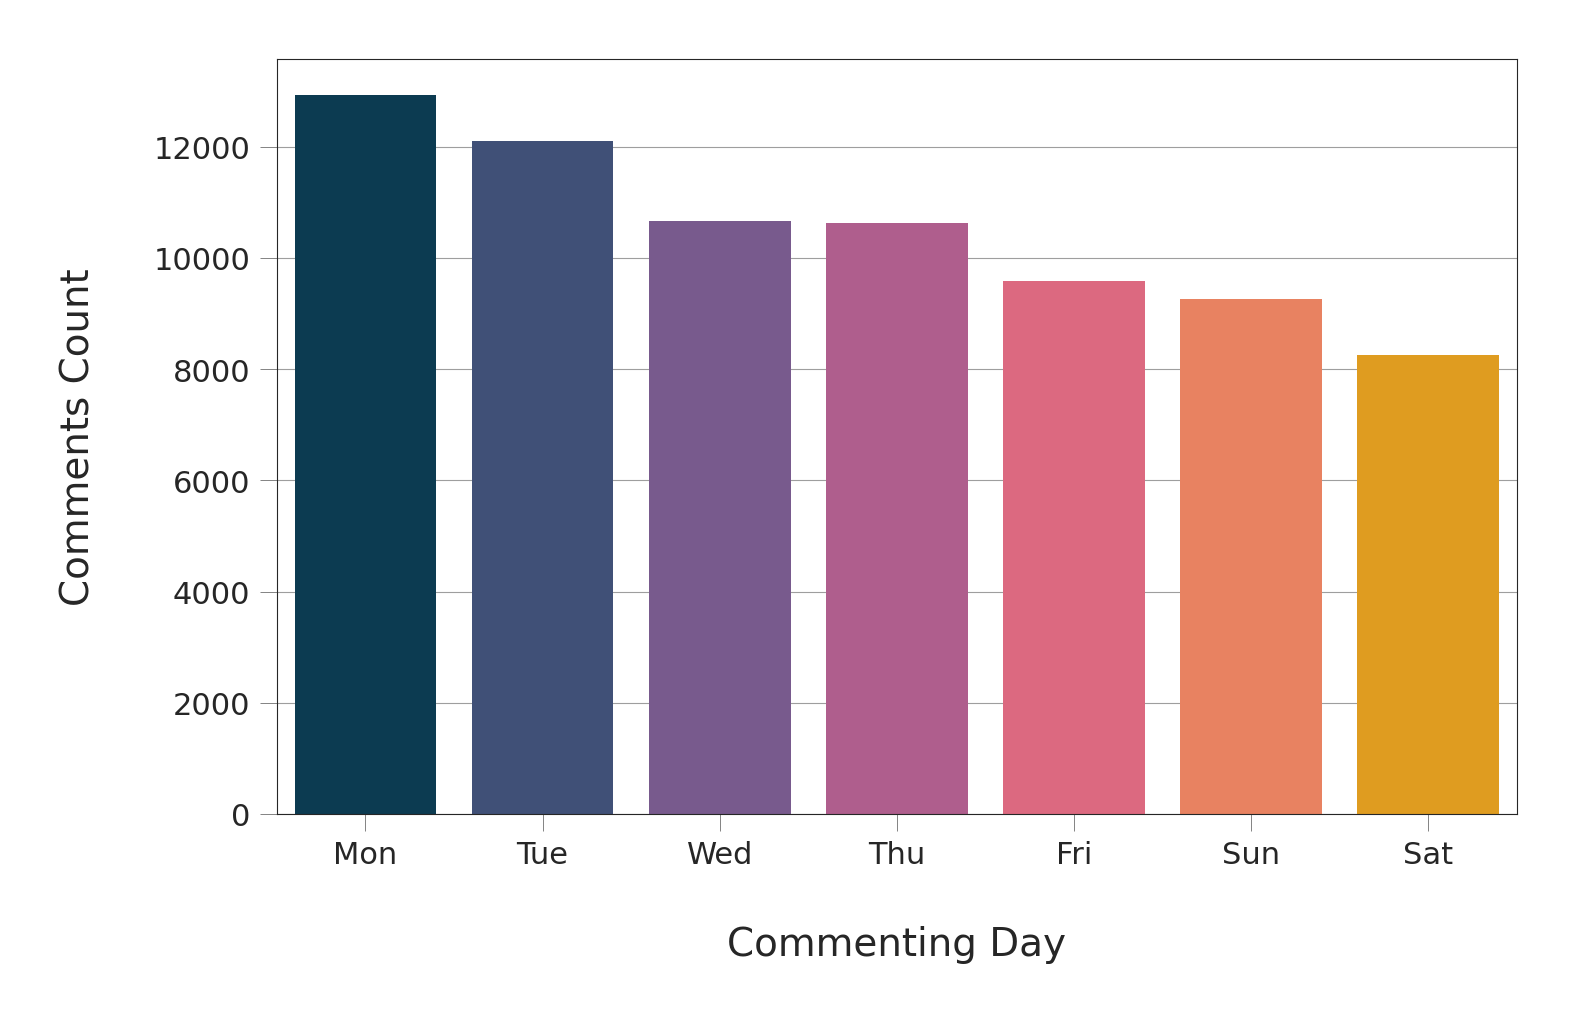

In [ ]:
cdf_d = df["commenting_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "commenting_day", "commenting_day": "No_of_videos"})

cdf_d = df.groupby("commenting_day").size().reset_index(name="comment_count") \
    .sort_values("comment_count", ascending=False)       
        
fig, ax = plt.subplots()
_ = sns.barplot(x="commenting_day", y="comment_count", data=cdf_d, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Commenting Day", ylabel="Comments Count")

# Commenting time of videos

In [ ]:
df["commenting_hour"] = df["time"].apply(lambda x: x[:2])
df.drop(labels='time', axis=1, inplace=False)

,channel,name,comment,date,year,likes,contains_capitalized,comment_length,commenting_day,commenting_hour
0,Simplilearn,Simplilearn,🔥 Enroll for FREE Machine Learning Course &amp...,2021-03-26,2021,4,True,376,Fri,10
1,Simplilearn,Garde Tanmay,can I please get the datasets my email is tanm...,2021-06-20,2021,0,True,97,Sun,16
2,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-20,2021,0,True,346,Sun,18
3,Simplilearn,Nirbhay Kumar,"Great video , May I request data set at reach2...",2021-06-20,2021,1,True,105,Sun,09
4,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",2021-06-20,2021,0,True,346,Sun,18
...,...,...,...,...,...,...,...,...,...,...
73452,Telusko,Ujjawal Raj,Waiting for next videos.....,2017-06-14,2017,0,False,28,Wed,15
73453,Telusko,ashish sinha,sir plz upload videos of data structure and al...,2017-06-14,2017,21,False,53,Wed,15
73454,Telusko,Bytler,"yes please, this would be great.",2017-06-27,2017,0,False,32,Tue,21
73455,Telusko,Sai Harshith Sunku,yes sir plzzz upload,2017-08-09,2017,0,False,20,Wed,16


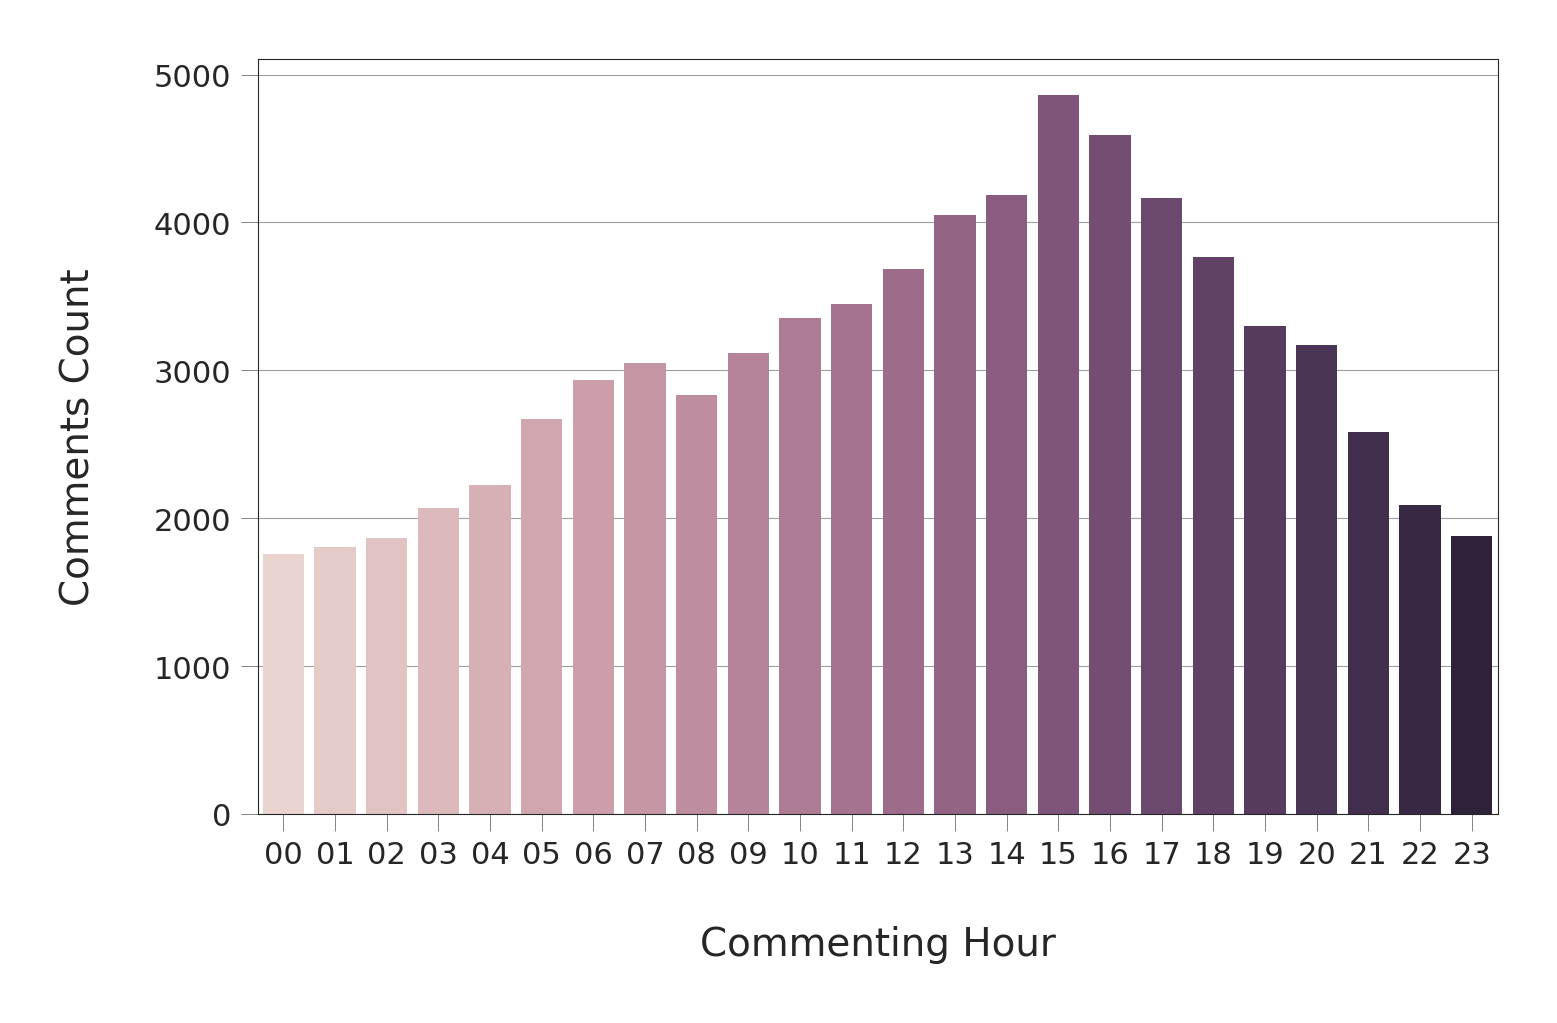

In [ ]:
cdf_h = df["commenting_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "commenting_hour", "commenting_hour": "comment_count"})

cdf_h = df.groupby("commenting_hour").size().reset_index(name="comment_count") \
    .sort_values("commenting_hour", ascending=True)            
        
fig, ax = plt.subplots()
_ = sns.barplot(x="commenting_hour", y="comment_count", data=cdf_h, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Commenting Hour", ylabel="Comments Count")